#### CREDIT CARD FRAUD DETECTION

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [113]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data=pd.read_csv("D:/New folder/Codsoft Internship/Credit card fraud detection/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [117]:
data.shape

(284807, 31)

In [118]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [123]:
#Checking for missing values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Checking the distribution of Classes

In [66]:
# Check the class distribution
class_counts = data['Class'].value_counts()
class_percentage = data['Class'].value_counts(normalize=True) * 100

class_counts, class_percentage


(0    284315
 1       492
 Name: Class, dtype: int64,
 0    99.827251
 1     0.172749
 Name: Class, dtype: float64)

In [68]:
class_counts_percentage = pd.DataFrame({
    'Class': ['Genuine (0)', 'Fraudulent (1)'],
    'Count': class_counts.values,
    'Percentage': class_percentage.values
})


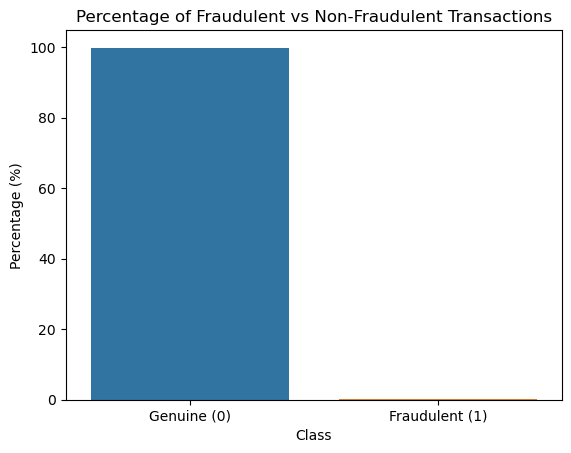

In [70]:
sns.barplot(x='Class', y='Percentage', data=class_counts_percentage)
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')
plt.show()


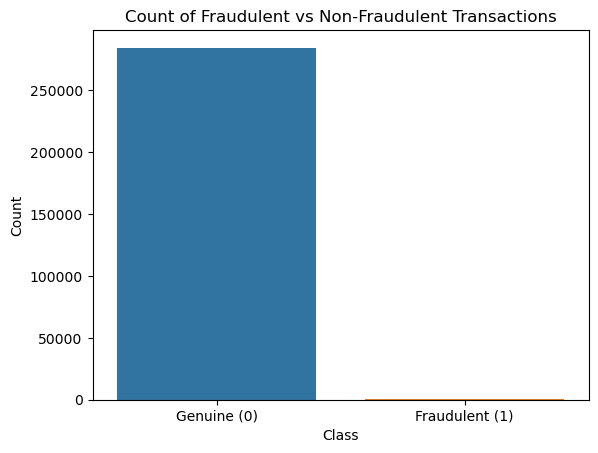

In [72]:
sns.barplot(x='Class', y='Count', data=class_counts_percentage)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In classification problems, class imbalance occurs when the number of instances in one class significantly higher than the number in the other.

Because many machine learning models aim to maximize overall accuracy, they may just learn to predict everything as class 'Genuine' with high accuracy.

There are a few techniquesto solve this problem. One among them is Oversampling the minority class (SMOTE)


#### Normalize the Time and Amount features using StandardScaler. V1–V28 are already scaled.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
# Putting features variables to X and target variable to y.
X = data.drop('Class', axis=1)
y = data['Class']

In [80]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Scaling only the training data, then using the same scaler on the test data
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

To handle class imbalance on the training set, we use SMOTE(Synthetic Minority Over-sampling Technique).


In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000, random_state=42)
model_LR.fit(X_train_resampled, y_train_resampled)
y_pred_LR = model_LR.predict(X_test)

In [90]:
y_pred_LR

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Evaluation of the model Performance

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[55419  1445]
 [    7    91]]


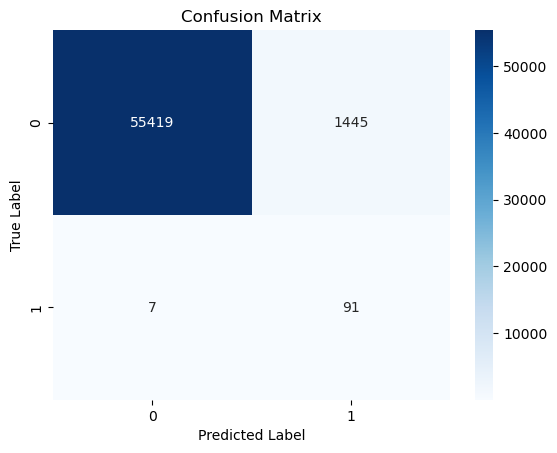

In [95]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [97]:
print("Classification Report:\n", classification_report(y_test, y_pred_LR))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



#### Random Forest Model

In [99]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
model_RF.fit(X_train_resampled, y_train_resampled)
y_pred_RF = model_RF.predict(X_test)


In [101]:
y_pred_RF

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Evaluation of the model Performance

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[56858     6]
 [   17    81]]


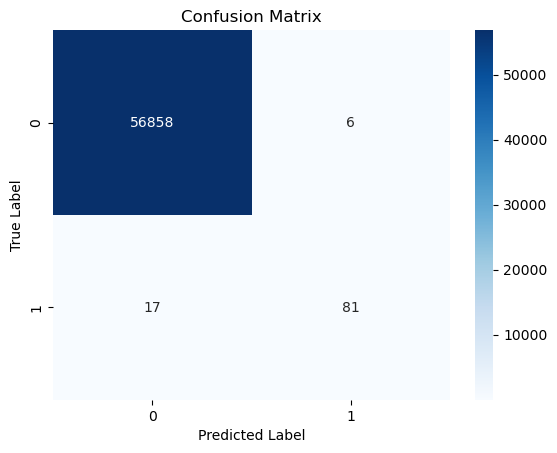

In [105]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [107]:
print("Classification Report:\n", classification_report(y_test, y_pred_RF))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest model performs better since it has higher precision(few false positives), recall(few false negatives) and F1-score.

Logistic Regression, despite high recall, fails in precision(predicting too many non-fraud cases as fraud).